In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data = {
    'PFV': ['LA CRUZ', 'LA LUCHA', 'MARCOVIA', 'MINE 1', 'MINE 2', 'NAVOJOA', 
            'TERRANOVA', 'SALINETAS', 'PUERTO DEL ROSARIO', 'ESCOBAR I', 
            'ESCOBAR II', 'CERRILLARES', 'SHUKAGAWA'],
    'PR (%) ó MED (MWh)': [80.61, 77.97, 81.52, 80.19, 76.14, 82.32, 83.22, 
                           85.09, 85.72, 87.84, 87.25, 91.76, 84.61],
    'PR (%) ó TED (MWh) Garant.': [80.5, 76.83, 77.60, 80.13, 77.33, 77.22, 
                                   80.10, 83.48, 81.71, 82.24, 82.28, 88.06, 81.62]
}

C:\Users\javier.sdiaz\AppData\Local\Temp\ipykernel_13704\1751747538.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['PFV'], rotation=45, ha='right')  # Rotar etiquetas para legibilidad


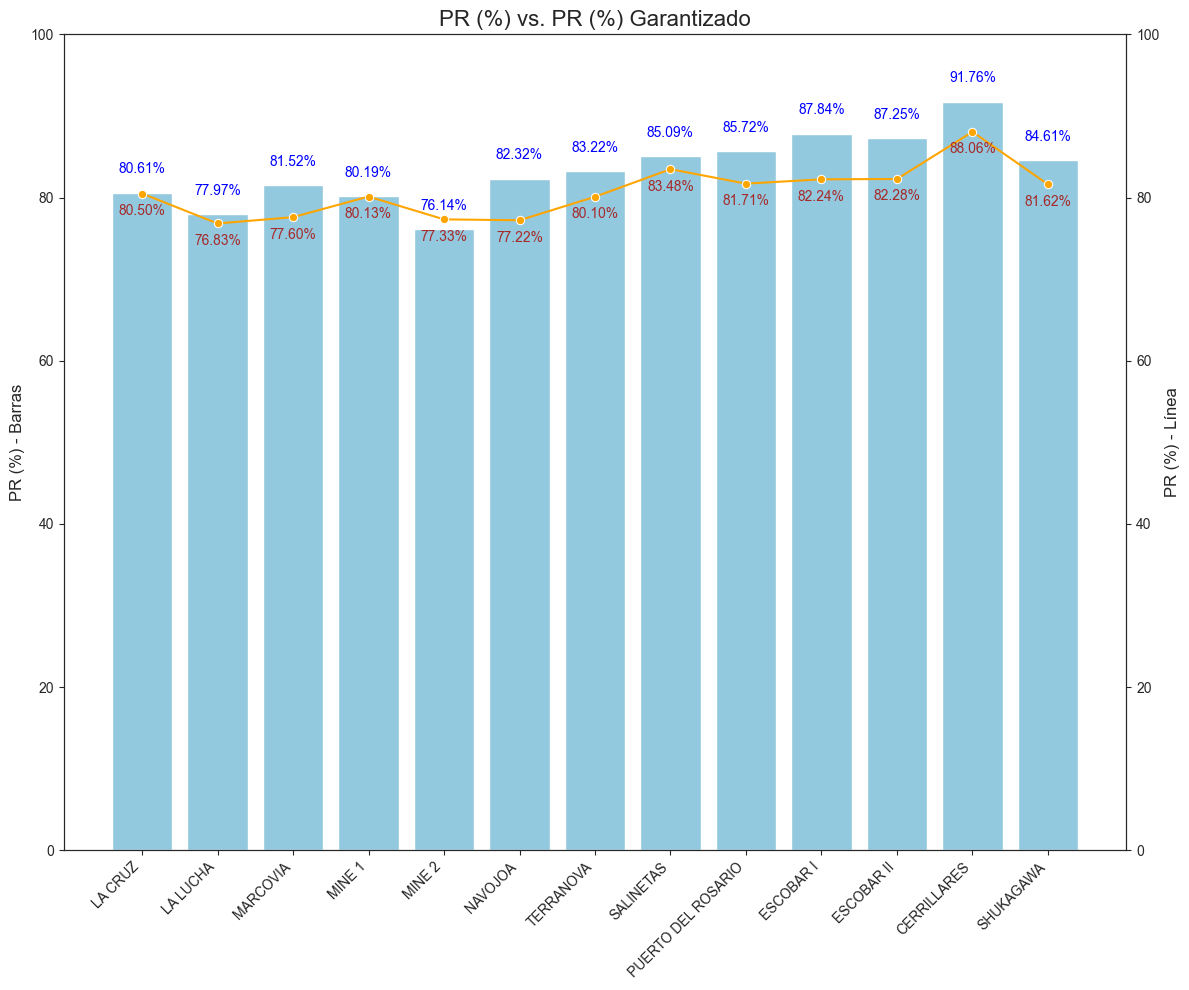

In [4]:
df = pd.DataFrame(data)
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(12, 10))
sns.barplot(x='PFV', y='PR (%) ó MED (MWh)', data=df, color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(
    x='PFV', y='PR (%) ó TED (MWh) Garant.', data=df, 
    color='orange', marker='o', linewidth=1.5, ax=ax2)


for i, row in df.iterrows():
    ax2.text(i, row['PR (%) ó TED (MWh) Garant.'] -3, f"{row['PR (%) ó TED (MWh) Garant.']:.2f}%", 
             color='brown', fontsize=10, ha='center', va='bottom')

for i, row in df.iterrows():
    ax1.text(i, row['PR (%) ó MED (MWh)'] +2, f"{row['PR (%) ó MED (MWh)']:.2f}%", 
             color='blue', fontsize=10, ha='center', va='bottom')
    
ax1.set_ylabel('PR (%) - Barras', fontsize=12)
ax2.set_ylabel('PR (%) - Línea', fontsize=12)
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
ax1.set_xlabel('')
ax1.set_xticklabels(df['PFV'], rotation=45, ha='right')  # Rotar etiquetas para legibilidad
ax1.set_title('PR (%) vs. PR (%) Garantizado', fontsize=16)


plt.tight_layout()
plt.show()


In [5]:
SS400 = {
    'PFV' : ['SAN SERVAN 3','SAN SERVAN 4','SAN SERVAN5'],
    'Energía medida (MWh)' : [56591.40,55967.54,58134.97],
    'Energía garantizada (MWh)' : [55938.75,55559.28,56549.77]
}

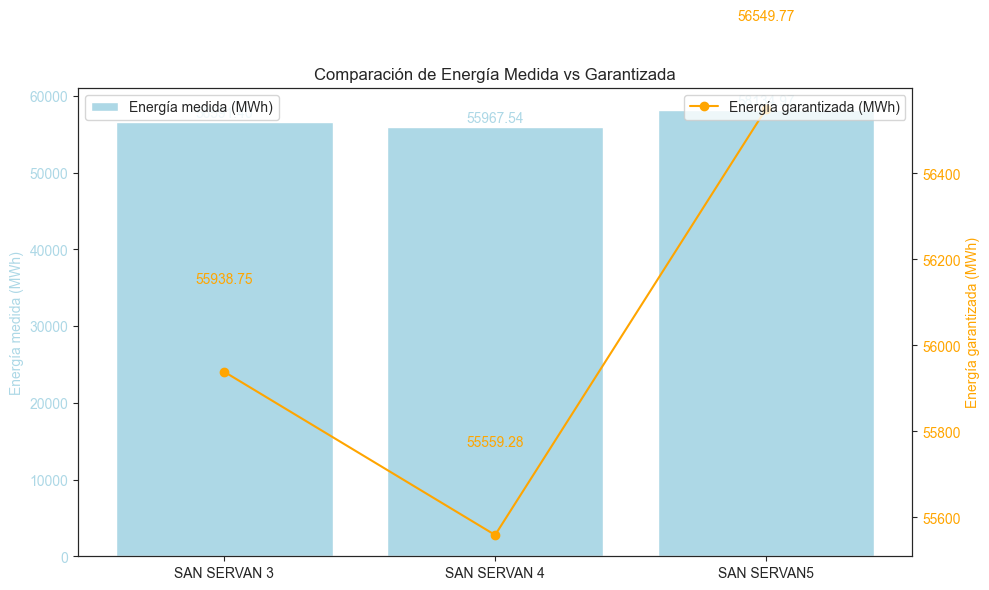

In [8]:
df_2 = pd.DataFrame(SS400)

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Colores
bar_color = 'lightblue'
line_color = 'orange'

# Gráfico de barras (Energía medida)
bars = ax1.bar(df_2['PFV'], df_2['Energía medida (MWh)'], color=bar_color, label='Energía medida (MWh)')
ax1.set_ylabel('Energía medida (MWh)', color=bar_color)
ax1.tick_params(axis='y', labelcolor=bar_color)

# Añadir etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 200, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, color=bar_color)

# Crear un segundo eje para la línea (Energía garantizada)
ax2 = ax1.twinx()
ax2.plot(df_2['PFV'], df_2['Energía garantizada (MWh)'], color=line_color, marker='o', label='Energía garantizada (MWh)')
ax2.set_ylabel('Energía garantizada (MWh)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Añadir etiquetas sobre los puntos de la línea
for i, value in enumerate(df_2['Energía garantizada (MWh)']):
    ax2.text(i, value + 200, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color=line_color)

# Título y leyendas
plt.title('Comparación de Energía Medida vs Garantizada')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()